In [1]:
from matplotlib import pyplot as plt
from sklearn import cluster, preprocessing
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import warnings, cv2
warnings.filterwarnings('ignore')

from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
def load_image(path, rgb=False):
    img = cv2.imread(path)
    if rgb:
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        
    return img

def static_of_pixel(img):
    df_c0 = pd.DataFrame(img[:, :, 0]).stack().reset_index()
    df_c1 = pd.DataFrame(img[:, :, 1]).stack().reset_index()
    df_c2 = pd.DataFrame(img[:, :, 2]).stack().reset_index()

    df_c0 = df_c0.rename(columns={'level_0': 'y', 'level_1': 'x', 0: 'r'})
    df_c1 = df_c1.rename(columns={'level_0': 'y', 'level_1': 'x', 0: 'g'})
    df_c2 = df_c2.rename(columns={'level_0': 'y', 'level_1': 'x', 0: 'b'})

    df = pd.merge(df_c0, df_c1, on=['x', 'y'])
    df = pd.merge(df, df_c2, on=['x', 'y'])
    df['count'] = 1
    return df.groupby(['r', 'g', 'b'])['count'].sum().reset_index().sort_values(['count'])

In [23]:
image_name = 'output_87.png'
image_path = f'/home/herry/hackthon/data/pic_atlas0519/{image_name}'
img = load_image(image_path, rgb=True)
useland_path = f'/home/herry/hackthon/data/pic_atlas_lanuse0519/{image_name}'
useland = load_image(useland_path, rgb=True)

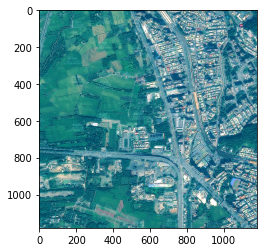

In [24]:
plt.imshow(img)

In [25]:
width, height, color = img.shape
x = img.reshape(width*height, color)

In [26]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2)
k_means.fit(x)
label = k_means.labels_.reshape(width, height)

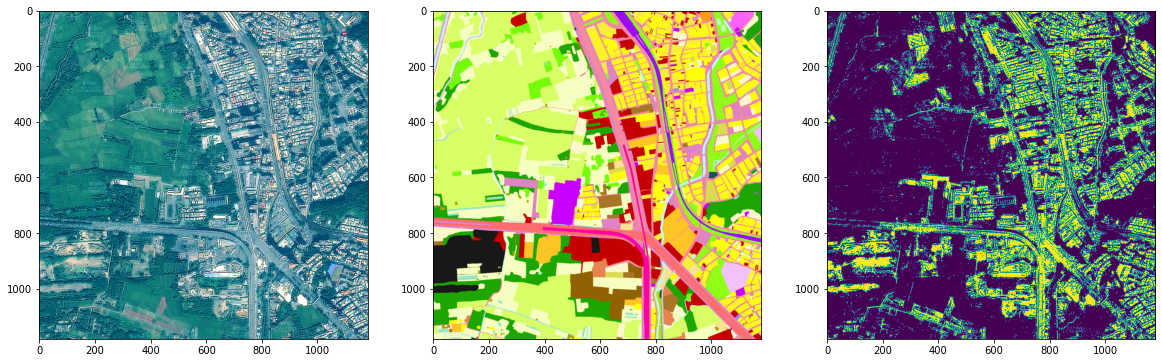

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
ax1.imshow(img)
ax2.imshow(useland)
ax3.imshow(label)

In [28]:
width, height, color = useland.shape
df_pixel = pd.DataFrame(useland.reshape(width*height, color))
df_pixel['count'] = 1
df_color_table = df_pixel.groupby([0, 1, 2])['count'].sum().reset_index().sort_values(['count'])

In [29]:
for r, g, b in df_color_table.iloc[-10:][[0, 1, 2]].values:
    color = (r, g, b)
    if color not in useless_colors:
        if color not in useless_colors_2:
            print(color)

In [30]:
useless_colors_2 = [(255, 255, 13),(255, 197, 37),(251, 235, 59),
                   (255, 154, 13),(196, 0, 0),(243, 193, 255)]

False


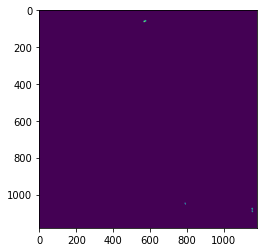

In [31]:
color = (255, 234, 163)

print(color in useless_colors)
mask = mask_of_specific_color(useland, color=color)
plt.imshow(mask)

In [32]:
def mask_of_specific_color(image, color):
    mask = np.where((image[:, :, 0] == color[0]) &
                    (image[:, :, 1] == color[1]) &
                    (image[:, :, 2] == color[2]), 1, 0)
    mask = mask.astype(np.uint8)
    return mask

In [33]:
useless_colors = [(193, 244, 255),(246, 138, 158),(224, 131, 197),
                 (240, 0, 0),(255, 109, 109),(255, 1, 166),
                 (151, 151, 151),(178, 221, 5),(157, 9, 255),
                 (210, 210, 210),(224, 131, 197),(246, 138, 158),
                 (30, 166, 0),(178, 221, 5),(193, 244, 255),
                 (142, 255, 21),(246, 138, 158),(255, 248, 207),
                 (246, 255, 193),(61, 192, 0),(151, 228, 198),
                 (118, 252, 8),(219, 219, 79),(195, 255, 195),
                 (31, 114, 10),(120, 120, 120),(184, 169, 12),
                 (155, 209, 255),(80, 135, 180),(200, 1, 255),
                 (0, 166, 122),(160, 215, 224),(217, 255, 103),
                 (24, 24, 24),(172, 109, 255)]

In [34]:
for rgb in useless_colors:
    mask = mask_of_specific_color(useland, color=rgb)
    label = np.where(label & mask, 0, label)

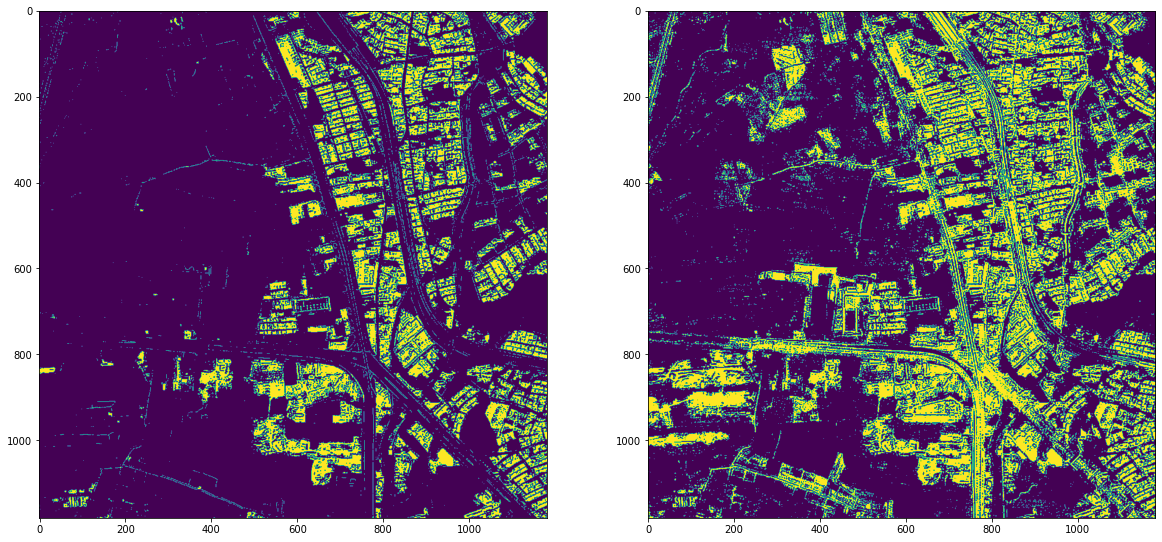

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.imshow(label)
ax2.imshow(k_means.labels_.reshape(width, height))

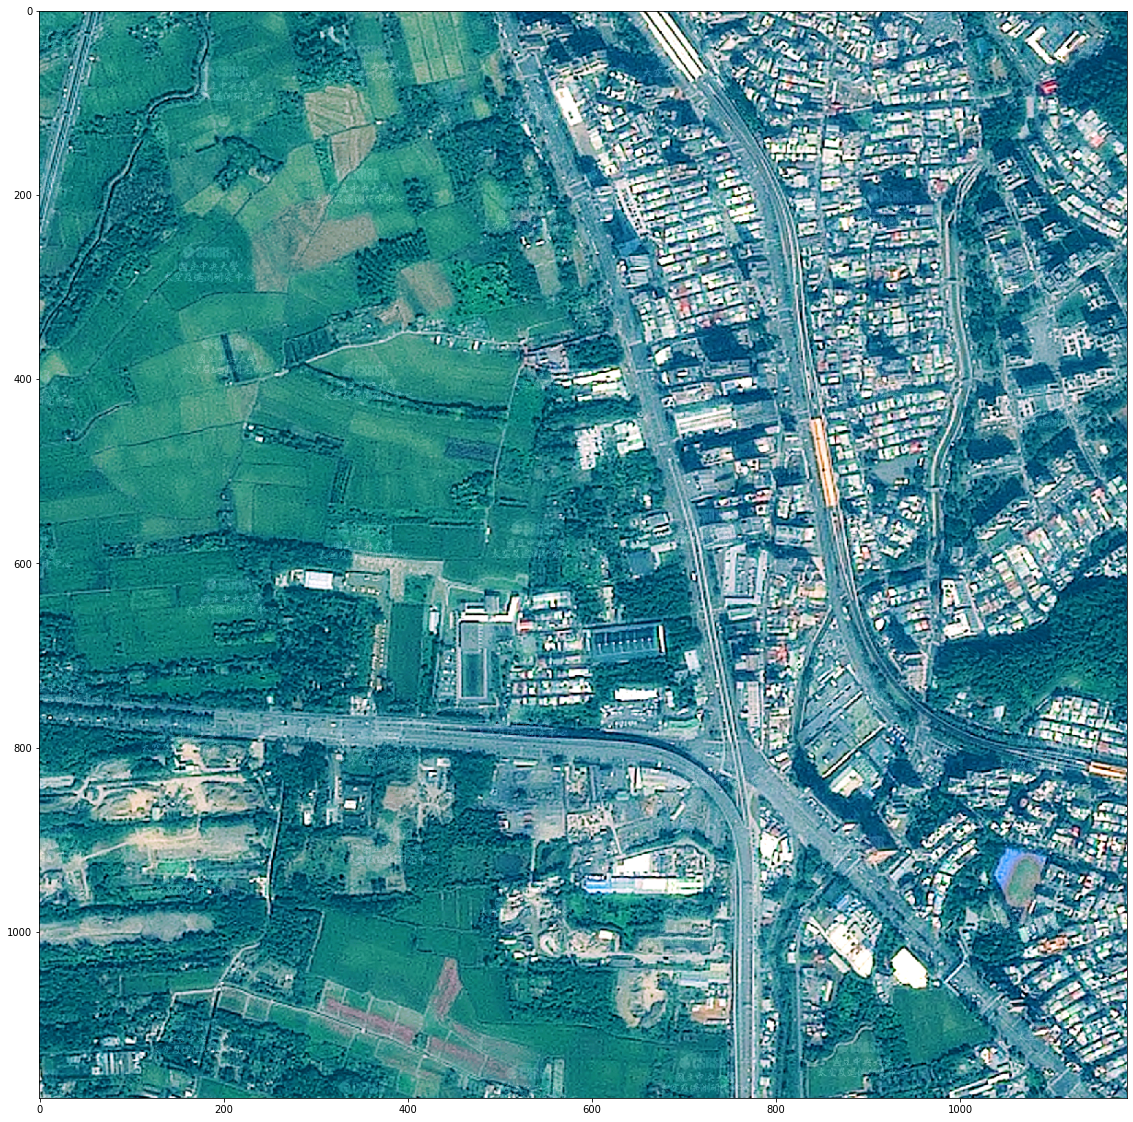

In [36]:
plt.figure(figsize=(20, 20))
plt.imshow(img)

In [37]:
path = f'/home/herry/hackthon/data/label/{image_name}'
cv2.imwrite(path, label)

True